In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [2]:
def transpose_data(data):
    data_by_name = {'param':[]}
    for param in data.keys():
        metric = data[param]
        for metric_name in metric.keys():
            if metric_name not in data_by_name.keys(): data_by_name[metric_name] = []
            data_by_name[metric_name].append(metric[metric_name])
        data_by_name['param'].append(int(param))
    df = pd.DataFrame(data_by_name)
    return df

In [3]:
result_file = '../../results/hdbscan_caterpillar.json'
with open(result_file, 'r') as f:
    data = json.load(f)
df = transpose_data(data)

<AxesSubplot: xlabel='IoU_recall', ylabel='IoU_precision'>

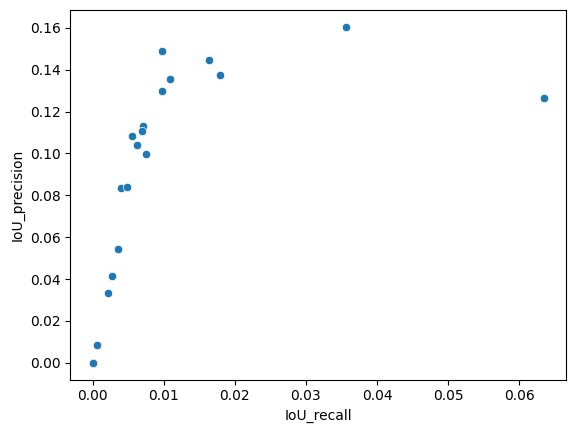

In [4]:
sns.scatterplot(data=df, x='IoU_recall', y='IoU_precision')

<AxesSubplot: xlabel='param', ylabel='IoU_F1'>

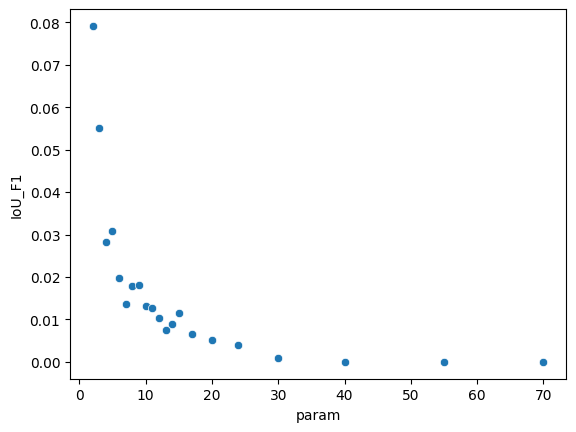

In [5]:
sns.scatterplot(data=df, x='param', y='IoU_F1')

In [6]:
result_file2 = '../../results/gmm_caterpillar.json'
with open(result_file2, 'r') as f:
    data2 = json.load(f)
df2 = transpose_data(data2)

<AxesSubplot: xlabel='IoU_recall', ylabel='IoU_precision'>

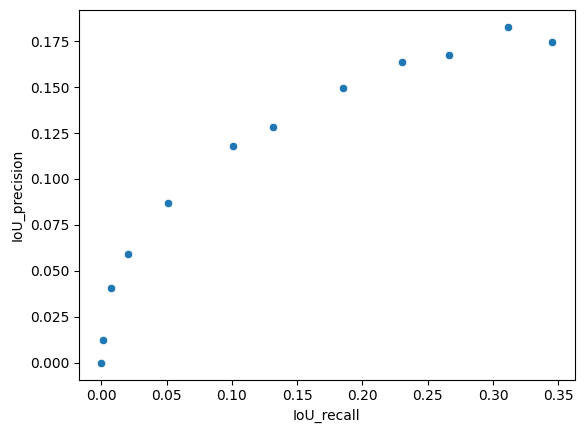

In [7]:
sns.scatterplot(data=df2, x='IoU_recall', y='IoU_precision')

<AxesSubplot: xlabel='param', ylabel='IoU_recall'>

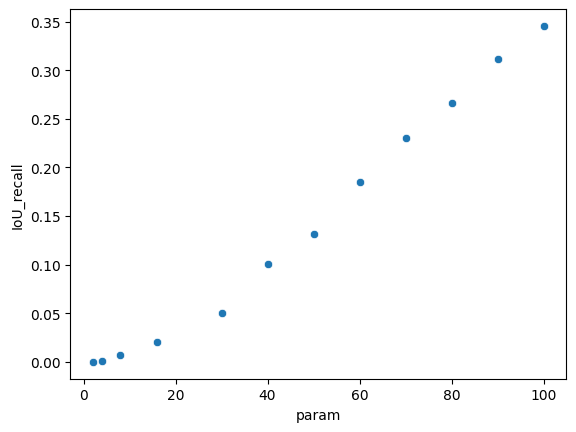

In [8]:
sns.scatterplot(data=df2, x='param', y='IoU_recall')

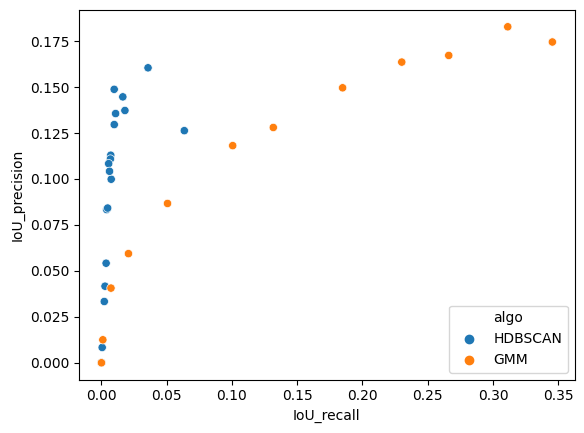

In [13]:
df['algo'] = 'HDBSCAN'
df2['algo'] = 'GMM'
df_total = pd.concat([df, df2], ignore_index=True)
plot = sns.scatterplot(data=df_total, x='IoU_recall', y='IoU_precision', hue='algo')

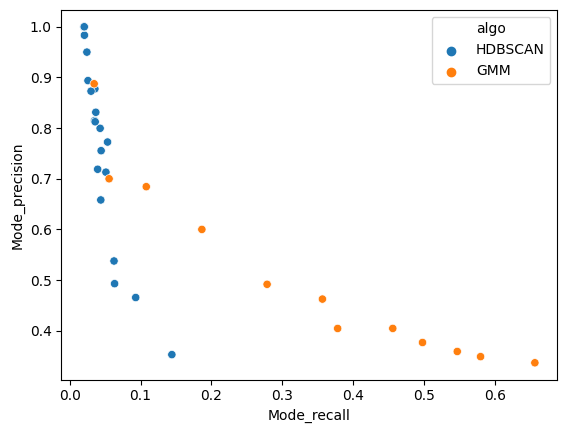

In [12]:
plot = sns.scatterplot(data=df_total, x='Mode_recall', y='Mode_precision', hue='algo')

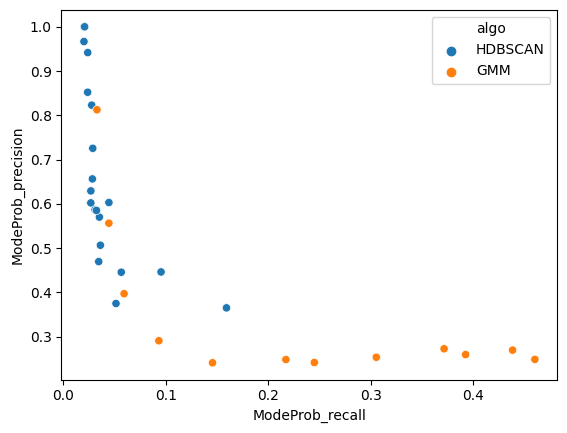

In [14]:
plot = sns.scatterplot(data=df_total, x='ModeProb_recall', y='ModeProb_precision', hue='algo')